# Weekly Exercise 02- Second Case (Reduced Sample) 

## Step 1: Import a number of libraries that we expect to use

In [2]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [3]:
b0 = 0  # y intercept
b1 = -1 # slope for x1
b2 = 1 # slope for x2

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In [8]:
sample_size = 500

In [9]:
x1_mean = 100
x1_stdev = 10
x1 = np.round(np.random.normal(x1_mean, x1_stdev, sample_size),2)

x2_mean = 100
x2_stdev = 10
x2 = np.round(np.random.normal(x2_mean, x2_stdev, sample_size),2)

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [10]:
y = b0 + b1*x1 + b2*x2

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all...

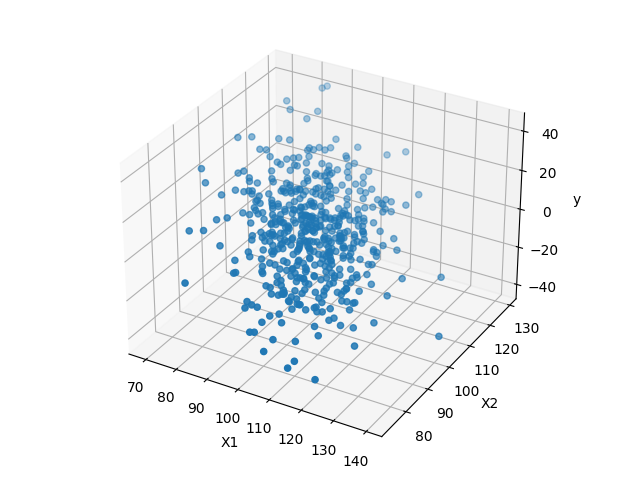

In [11]:
# this is a notebook 'MAGIC' that will allow for creation of interactive plot
%matplotlib widget 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

%matplotlib inline

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In [12]:
e_mean = 0
e_stdev = 10
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

## Step 5: Explore the resulting synthesized data

Now, let's look at a scatter plot of both the X and y data with the noise added in...

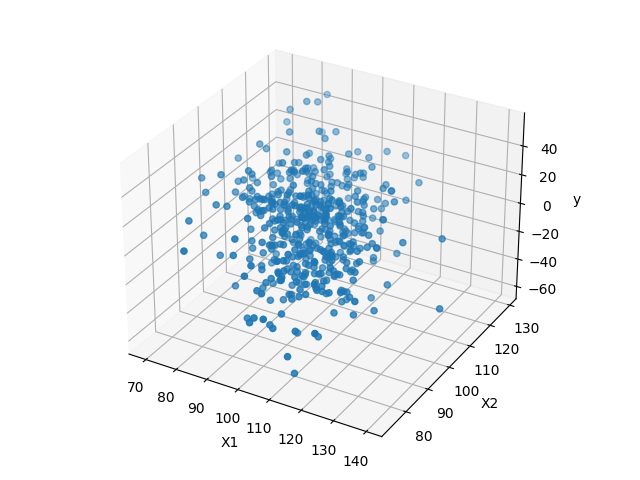

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

### Step 6: Create a pandas data frame from the data

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv. 

First we will create a dataframe with the data we just similated...

In [15]:
df = pd.DataFrame({'x1': x1, 'x2' : x2, 'target': y})
df

,x1,x2,target
0,86.93,95.53,10.49
1,100.76,102.04,13.52
2,103.67,106.12,-0.56
3,112.33,107.45,-2.37
4,95.77,99.64,13.15
...,...,...,...
495,105.78,89.02,-14.63
496,90.39,113.09,14.65
497,85.42,107.33,15.44
498,104.94,106.52,12.96


Seperate out the input m(X) and the target (y)

In [16]:
X = df[['x1', 'x2']]
y = df[['target']]

For educational purposes, let's look at the first five values in X and y (note how X is an array of lists)

## Step 7: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

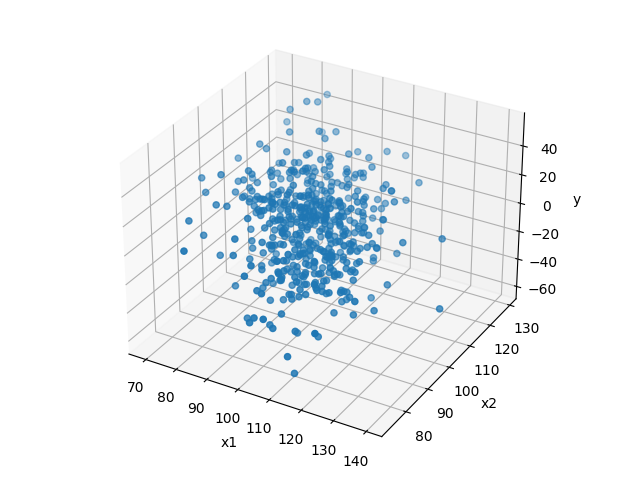

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['x1'], df['x2'], y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

## Step 8: Fit the model

Fit the linear regression model to the dataset

In [18]:
lin_reg = LinearRegression().fit(X,y)

## Step 9: Analyze the linear regression model's performance

Visualize the linear regression model results

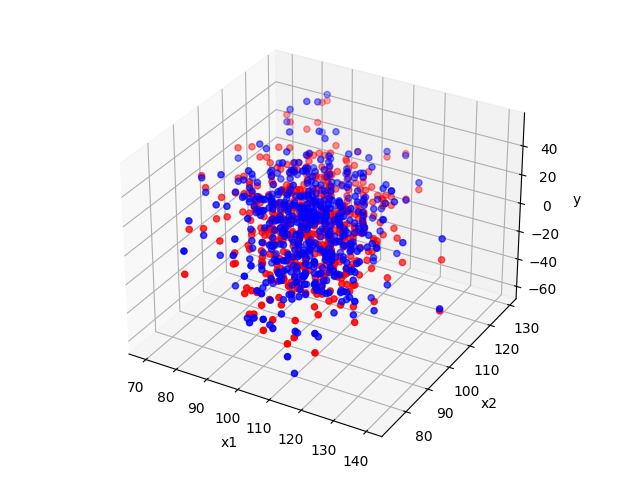

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X['x1'], X['x2'], y, color='blue')
ax.scatter(X['x1'], X['x2'], lin_reg.predict(X), color='red')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

In [21]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
b2 = lin_reg.coef_[0][1]
r2 = lin_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x1 + {b2:.2f}")
print(f"R^2: {r2:.3f}")

Y = -3.47 + -0.99x1 + 1.03
R^2: 0.632


## Interpretation of the above model and Comparison with the inclass model 2

Form above model output Y = -3.47 + -0.99x1 + 1.03
and its score R^2: 0.632, intercept is -3.47, beta_1 is -0.99 and beta_2 is 1.03
In class model2 output Y = 7.68 + -1.05x1 + 0.97 R^2: 0.682

We know that R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. 

From the above model we can infer that R^2 is less compared to the inclass model output. Which means the dependent variable is not well explained by the independent variable. It is because we have decreased the number of observations to 500 compared to the inclass model samples (1000). It is always better to have more number of observation from which can learn and so that it can perform well on unknown data. since all other parameters of the models are same for both the models, the inclass model performs well because of the more number of observation in the regression.